# GOAL
Understand the distribuition of consumption time by set.
- Get consumption detailed information
- plot consumption graphs

# PACKAGES

In [12]:
import pandas as pd
from google.oauth2 import service_account
import pandas_gbq
import seaborn as sns

# PARAMETERS

In [50]:
project_id = "analytics-dev-308300"

credentials = service_account.Credentials.from_service_account_file(
    "../keys/gcp_key.json",
)

sns.set(rc={'figure.figsize':(11.7,8.27)})

# FUNCTIONS

# DATA WRANGLING

In [67]:
query="""
SELECT * from dtm_engagement.ft_content_consumption
WHERE group_id=1818
"""

df=pd.read_gbq(query=query, credentials=credentials, project_id=project_id)
df['clipped_duration']=(df['consumption_duration'].clip(upper=600))/60
df['set_id_cards']=df['set_id'].astype('str')+ '('+df['cards'].astype('str')+')'

In [68]:
df.sample(5)

,group_id,user_id,sequence_id,set_id,set_tests,finished_tests,progress,cards,tests,started_at,completed_at,date_str,consumption_duration,clipped_duration,set_id_cards
292,1818,20166,None,11457,1,0,0.0,3,1,NaT,NaT,2021-08-29,NaN,NaN,11457(3)
445,1818,20302,None,11724,1,0,0.0,15,1,NaT,NaT,2021-08-29,NaN,NaN,11724(15)
379,1818,20166,None,11682,0,0,0.0,7,0,NaT,NaT,2021-08-29,NaN,NaN,11682(7)
393,1818,20108,None,11717,0,0,0.0,6,0,NaT,NaT,2021-08-29,NaN,NaN,11717(6)
404,1818,20029,None,11717,0,0,0.0,6,0,NaT,NaT,2021-08-29,NaN,NaN,11717(6)


<AxesSubplot:xlabel='set_id_cards', ylabel='clipped_duration'>

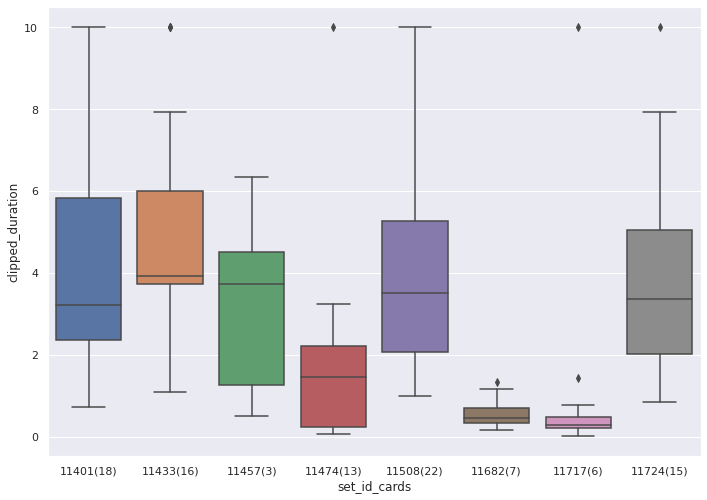

In [70]:
sns.boxplot(data=df.sort_values(by='set_id'),x='set_id_cards',y='clipped_duration')

<AxesSubplot:xlabel='set_id_cards', ylabel='clipped_duration'>

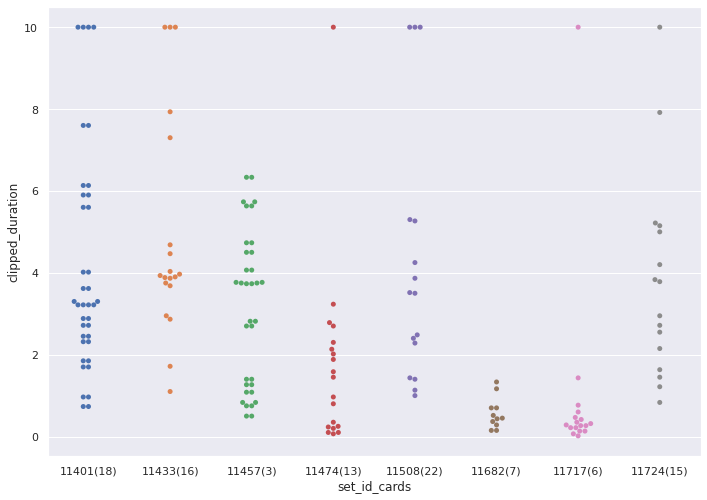

In [71]:
sns.swarmplot(data=df.sort_values(by='set_id'),x='set_id_cards',y='clipped_duration')

<AxesSubplot:xlabel='set_id_cards', ylabel='clipped_duration'>

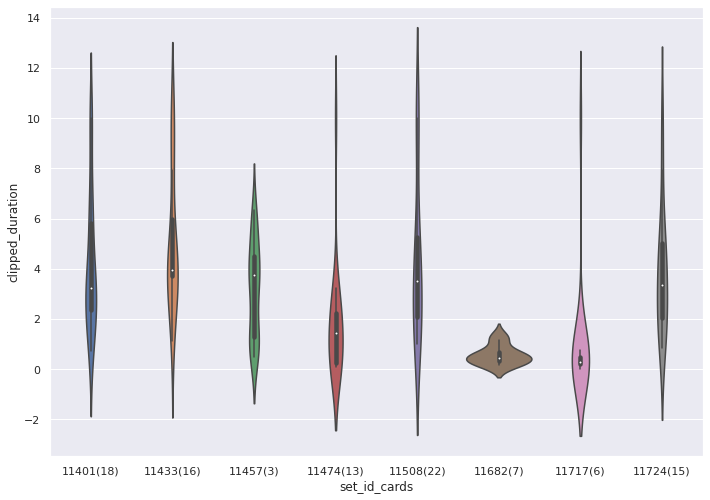

In [72]:
sns.violinplot(data=df.sort_values(by='set_id'),x='set_id_cards',y='clipped_duration')

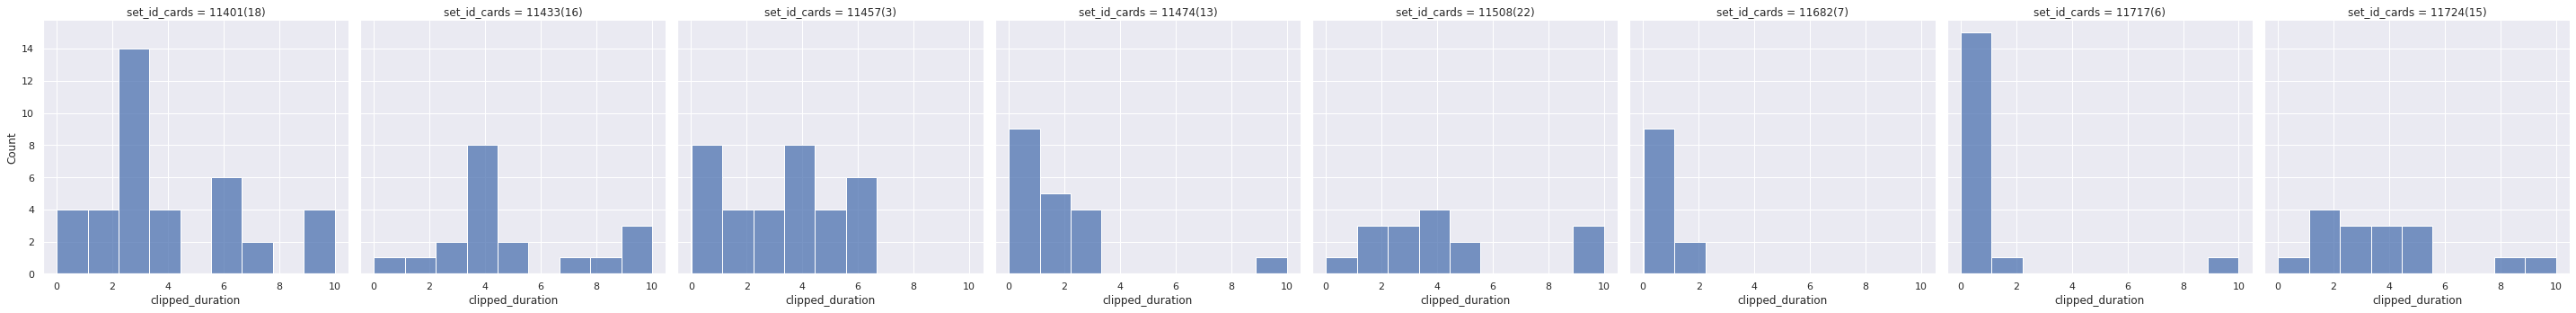

In [73]:
sns.displot(data=df.sort_values(by='set_id'),col='set_id_cards',x='clipped_duration')